# Understanding Fourier Series
>Cogworks 2018  (AJ Federici)

A Taylor Series is the representation of **any** function as a _Series_ of polynomials. And by representation we mean that any function has an exact parallel in the form of an infinite sum of polynomials.  However, we will mostly use approximations that are _almost_ exact as computers don't work well with anything infinite.  While we won't be working with Taylor Series, we will be working with Fourier Series which is the same idea, except using cosine and sine to represent functions instead of polynomials.

Plot it below

<IPython.core.display.Javascript object>


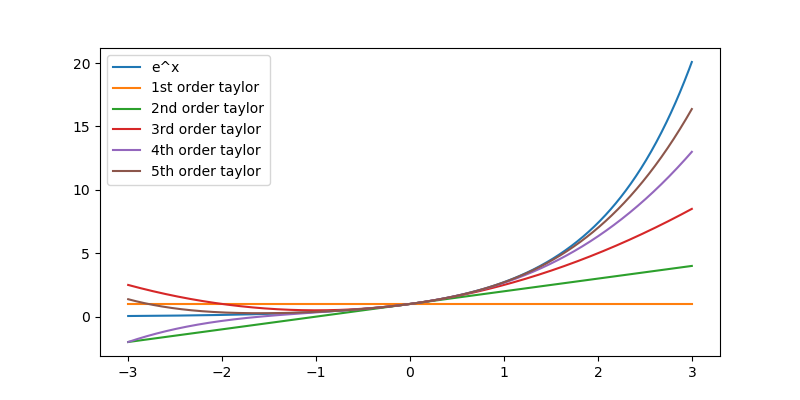

In [45]:
plot_ex()

As you can see above we have the function e^x and then its corresponding 1st, 2nd, 3rd, 4th, and 5th degree taylor polynomial.  As the degree gets larger we get a closer and closer approximation.  The formula for finding a taylor polynomial is shown below and we will run through some simple calculations for e^x.

We will use a Maclaurin Series which is a special case of the Taylor Series (it's centered about 0)

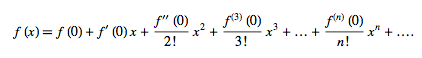


\begin{equation}
e^{x} = e^{0} = 1
\end{equation}

\begin{equation}
e^{x} =  e^{0} + x \frac{\partial}{\partial x} f({0}) = 1 + x
\end{equation}

\begin{equation}
e^{x} =  e^{0} + x \frac{\partial}{\partial x} f({0}) + x^{2} \frac{\partial}{\partial x}\frac{\partial}{\partial x} f({0})= 1 + x + 0.5x^2
\end{equation}

\begin{equation} ............\end{equation}

This process will continue infinitely until the the right side and the left side are exactly equal
You get the simplification from the fact that all of the derivatives for e^{x} are e^{x}, and then evaluating them at 0 you get 1, leaving just the x terms divided by a factorial.


Now, lets work out a simple Fourier Series example since that will be more applicable to the course

We will be using the function
 - $f(x) = x^{2}$

- - - 
- General Formula $\begin{equation}
\\f(x) = \sum_{k=0}^{\inf} \alpha_n cos(\frac{2\pi k x}{L}) + \beta_n sin(\frac{2\pi k x}{L})
\end{equation}$

Using our math intuition, we can figure out that the entire $sin$ term will cancel itself out.  In solving for the coefficients $\alpha$ and $\beta$ we will need to integrate with respect to our function (x^{2}) and either cos or sin depending on if we're solving or $\alpha$ or $\beta$.  x^{2} is an even function (symmetric about the y-axis) and sin(x) is an odd function (f(-x) = -f(x)).  The product of an even function with an odd function is odd, and since we will be integrating over that product from -L to L you can see by the definition of an odd function why all of our $\beta$s will go to 0 cancelling out the sin term

Lets chose to look $x^{2}$ from -$\pi$ to $\pi$

Plot it below


<IPython.core.display.Javascript object>


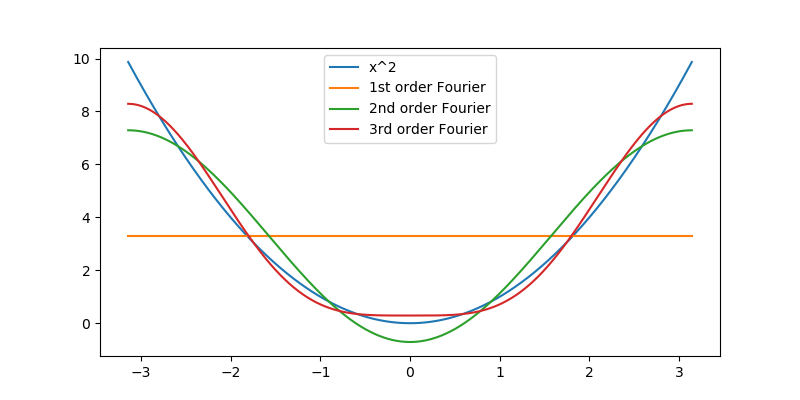

In [46]:
plot_x2()

As you can see - similarly to our Taylor Series Approximations - our Fourier Series is also becoming a better approximation the more terms we include.  You can also see some parallels!  Instead of our first term being the initial value it is now the _average_ value of the function, but is a similar idea

Solving for our a_0 term we see that 

$\begin{equation}
\\\alpha_0 = \frac{1}{2 \pi}\int_{-\pi}^{\pi} x^{2} dx = \frac{\pi^2}{3}
\end{equation}$

This is the average value of our function on this domain!

Now we have a general formula for finding the rest of the $\alpha$ variables.  As you can see that n term being 0 will cancel out the cos term leaving just the original function (x^{2})

$\begin{equation}
\\\alpha_n = \frac{1}{\pi}\int_{-\pi}^{\pi} x^{2} \cos(nx) dx = \frac{\pi^2}{3}
\end{equation}$

This function is not as easy to integrate by hand but doing it on a calculator is comes out to be

$\begin{equation}
\\\frac{2(\pi^2 n^2 - 2)\sin(\pi n) + 4 \pi n cos(\pi n)}{\pi n^3}
\end{equation}$

But remember, we are letting n be small integers for this demonstration making them come out very nicely.

For n = 1
$\begin{equation}
\\\frac{2(\pi^2 1^2 - 2)\sin(\pi) + 4 \pi cos(\pi 1)}{\pi 1^3} = \frac{2(\pi^2 - 2)\sin(\pi) + 4 \pi cos(\pi)}{\pi} = \frac{2(\pi^2 - 2)\sin(\pi) - 4 \pi }{\pi} = -4
\end{equation}$

For n = 2
$\begin{equation}
\\\frac{2(\pi^2 2^2 - 2)\sin(\pi 2) + 4 \pi n cos(\pi 2)}{\pi 2^3} = \frac{8 \pi  cos(2 \pi)}{2^3 \pi} = 1
\end{equation}$

In [1]:
def plot_ex():
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib notebook
    x = np.linspace(-3,3,1000)
    y = np.exp(x)
    y1st = 1
    y2nd = x
    y3rd = x**2 / 2
    y4th = x**3 / (3 * 2)
    y5th = x**4 / (4 * 3 * 2)
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, label = 'e^x');
    ax.plot(x, [y1st for i in range(len(x))], label = '1st order taylor');
    ax.plot(x, y1st + y2nd, label = '2nd order taylor');
    ax.plot(x, y1st + y2nd + y3rd, label = '3rd order taylor');
    ax.plot(x, y1st + y2nd + y3rd + y4th, label = '4th order taylor');
    ax.plot(x, y1st + y2nd + y3rd + y4th + y5th, label = '5th order taylor');
    plt.legend(loc='best')

In [2]:
def plot_x2():
    x = np.linspace(-np.pi,np.pi,1000)
    y = x**2
    y1st = np.pi ** 2 / 3
    y2nd = -4 * np.cos(x)
    y3rd = np.cos(2*x)
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, label = 'x^2');
    ax.plot(x, [y1st for i in range(len(x))], label = '1st order Fourier');
    ax.plot(x, y1st + y2nd, label = '2nd order Fourier');
    ax.plot(x, y1st + y2nd + y3rd, label = '3rd order Fourier');
    plt.legend(loc='best')